In [25]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
crimeDF= pd.read_csv("Seattle_crime.csv", low_memory=False)
weatherDF = pd.read_csv("Seattle_weather.csv")

C:\Users\dylan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
crimeDF.head()

,Report Number,Offense Start DateTime,Offense End DateTime,Report DateTime,Crime Against Category,Offense Parent Group,Offense
0,2020-044620,2/5/2020 10:10,NaN,2/5/2020 11:24,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations
1,2020-044452,2/3/2020 8:00,2/4/2020 8:00,2/5/2020 10:06,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories
2,2020-044465,2/2/2020 20:30,2/2/2020 21:30,2/5/2020 9:39,PROPERTY,ROBBERY,Robbery
3,2020-044225,2/5/2020 1:17,2/5/2020 2:21,2/5/2020 3:30,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property
4,2020-044076,2/5/2020 0:51,NaN,2/5/2020 0:51,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence


In [4]:
weatherDF.head()

,DATE,PRCP,TMAX,TMIN,RAIN,TAVG
0,12/14/2017,0.0,50.0,36.0,False,43.0
1,12/13/2017,0.0,48.0,34.0,False,41.0
2,12/12/2017,0.0,46.0,32.0,False,39.0
3,12/11/2017,0.0,49.0,29.0,False,39.0
4,12/10/2017,0.0,49.0,34.0,False,41.5


In [5]:
df_split = crimeDF['Offense Start DateTime'].str.split(' ',expand=True)

In [6]:
crimeDF['Offense Start DateTime'] = df_split[0]
crimeDF.rename(columns={"Offense Start DateTime": "DATE"},inplace = True)

In [7]:
crimeDF.drop('Offense End DateTime', axis=1, inplace=True)
crimeDF.drop('Report DateTime', axis=1, inplace=True)
crimeDF.drop('Report Number', axis=1, inplace=True)

In [8]:
crimeDF

,DATE,Crime Against Category,Offense Parent Group,Offense
0,2/5/2020,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations
1,2/3/2020,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories
2,2/2/2020,PROPERTY,ROBBERY,Robbery
3,2/5/2020,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property
4,2/5/2020,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence
...,...,...,...,...
1012484,7/13/2013,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft
1012485,6/26/2013,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft
1012486,2/14/2012,PROPERTY,LARCENY-THEFT,Shoplifting
1012487,9/19/2010,PROPERTY,LARCENY-THEFT,Shoplifting


In [9]:
# weatherDF.to_csv('Seattle_weather_trimmed.csv')
# crimeDF.to_csv('Seattle_crime_trimmed.csv')

In [10]:
crime_2017= pd.read_csv("Seattle_crime_2017.csv", low_memory=False)
weather_2017 = pd.read_csv("Seattle_weather_2017.csv")

In [11]:
joined = pd.merge(crime_2017, weather_2017,how='right',on='DATE')

In [12]:
joined

,DATE,Crime Against Category,Offense Parent Group,Offense,PRCP,TMAX,TMIN,RAIN,TAVG
0,12/14/2017,PROPERTY,LARCENY-THEFT,All Other Larceny,0.00,50,36,False,43.0
1,12/14/2017,PROPERTY,LARCENY-THEFT,All Other Larceny,0.00,50,36,False,43.0
2,12/14/2017,PROPERTY,FRAUD OFFENSES,Welfare Fraud,0.00,50,36,False,43.0
3,12/14/2017,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,0.00,50,36,False,43.0
4,12/14/2017,PROPERTY,BAD CHECKS,Bad Checks,0.00,50,36,False,43.0
...,...,...,...,...,...,...,...,...,...
69687,1/1/2017,PROPERTY,FRAUD OFFENSES,Identity Theft,0.43,37,28,True,32.5
69688,1/1/2017,PROPERTY,FRAUD OFFENSES,Identity Theft,0.43,37,28,True,32.5
69689,1/1/2017,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,0.43,37,28,True,32.5
69690,1/1/2017,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,0.43,37,28,True,32.5


#### Probability of Offense Parent Group Given Cold, Mild, or Hot:

In [14]:
offenses = joined['Offense Parent Group'].unique()

In [15]:
temp = joined['TAVG'].astype(float)
tot_cold = temp[temp < 32.0].count()
tot_mild = temp[(temp >= 32.0) & (temp <= 75.0)].count()
tot_hot = temp[temp > 75.0].count()
total = temp.count()
cold = []
mild = []
hot = []
for offense in offenses:
    num_cold = len(joined[(joined['Offense Parent Group'] == offense) & (temp < 32.0)])
    num_mild = len(joined[(joined['Offense Parent Group'] == offense) & (temp >= 32.0) & (temp <= 75.0)])
    num_hot = len(joined[(joined['Offense Parent Group'] == offense) & (temp > 75.0)])
    cold.append((offense,(num_cold/tot_cold).round(5)))
    mild.append((offense,(num_mild/tot_mild).round(5)))
    hot.append((offense,(num_hot/tot_hot).round(5)))

In [16]:
cold

[('LARCENY-THEFT', 0.36303),
 ('FRAUD OFFENSES', 0.04786),
 ('BAD CHECKS', 0.00884),
 ('MOTOR VEHICLE THEFT', 0.05302),
 ('SEX OFFENSES', 0.00368),
 ('DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 0.0891),
 ('DRIVING UNDER THE INFLUENCE', 0.01325),
 ('PROSTITUTION OFFENSES', 0.00295),
 ('ROBBERY', 0.01546),
 ('DRUG/NARCOTIC OFFENSES', 0.03903),
 ('FAMILY OFFENSES, NONVIOLENT', 0.01988),
 ('STOLEN PROPERTY OFFENSES', 0.00663),
 ('WEAPON LAW VIOLATIONS', 0.0081),
 ('TRESPASS OF REAL PROPERTY', 0.06406),
 ('ASSAULT OFFENSES', 0.13918),
 ('BURGLARY/BREAKING&ENTERING', 0.10825),
 ('COUNTERFEITING/FORGERY', 0.01105),
 ('KIDNAPPING/ABDUCTION', 0.00074),
 ('ARSON', 0.00368),
 ('PEEPING TOM', 0.0),
 ('HOMICIDE OFFENSES', 0.0),
 ('EXTORTION/BLACKMAIL', 0.0),
 ('EMBEZZLEMENT', 0.0),
 ('PORNOGRAPHY/OBSCENE MATERIAL', 0.00074),
 ('CURFEW/LOITERING/VAGRANCY VIOLATIONS', 0.00074),
 ('LIQUOR LAW VIOLATIONS', 0.00074),
 ('BRIBERY', 0.0),
 ('GAMBLING OFFENSES', 0.0),
 ('SEX OFFENSES, CONSENSUAL', 0.0),
 ('

<BarContainer object of 30 artists>

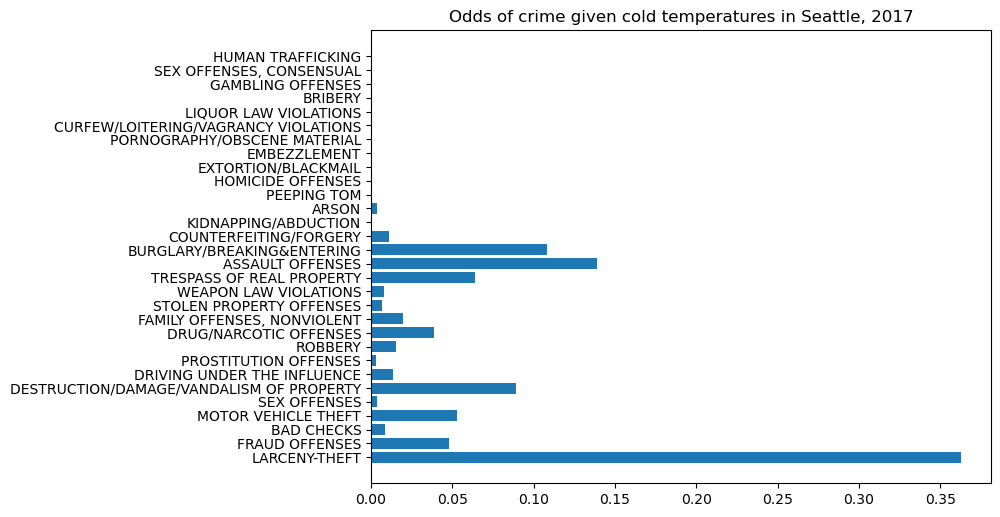

In [30]:
off = []
perc = []
for o,p in cold:
    off.append(o)
    perc.append(p)

figure(figsize=(8, 6), dpi=100)
plt.title("Odds of crime given cold temperatures in Seattle, 2017")
plt.barh(off,perc)

In [17]:
mild

[('LARCENY-THEFT', 0.37011),
 ('FRAUD OFFENSES', 0.05379),
 ('BAD CHECKS', 0.00657),
 ('MOTOR VEHICLE THEFT', 0.05058),
 ('SEX OFFENSES', 0.00748),
 ('DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 0.09118),
 ('DRIVING UNDER THE INFLUENCE', 0.01868),
 ('PROSTITUTION OFFENSES', 0.00528),
 ('ROBBERY', 0.02122),
 ('DRUG/NARCOTIC OFFENSES', 0.03174),
 ('FAMILY OFFENSES, NONVIOLENT', 0.01229),
 ('STOLEN PROPERTY OFFENSES', 0.00681),
 ('WEAPON LAW VIOLATIONS', 0.01091),
 ('TRESPASS OF REAL PROPERTY', 0.0529),
 ('ASSAULT OFFENSES', 0.14049),
 ('BURGLARY/BREAKING&ENTERING', 0.10606),
 ('COUNTERFEITING/FORGERY', 0.00426),
 ('KIDNAPPING/ABDUCTION', 0.0011),
 ('ARSON', 0.00199),
 ('PEEPING TOM', 0.00032),
 ('HOMICIDE OFFENSES', 0.00041),
 ('EXTORTION/BLACKMAIL', 0.00111),
 ('EMBEZZLEMENT', 0.00202),
 ('PORNOGRAPHY/OBSCENE MATERIAL', 0.00032),
 ('CURFEW/LOITERING/VAGRANCY VIOLATIONS', 0.00086),
 ('LIQUOR LAW VIOLATIONS', 0.00125),
 ('BRIBERY', 3e-05),
 ('GAMBLING OFFENSES', 3e-05),
 ('SEX OFFENSES, CO

<BarContainer object of 30 artists>

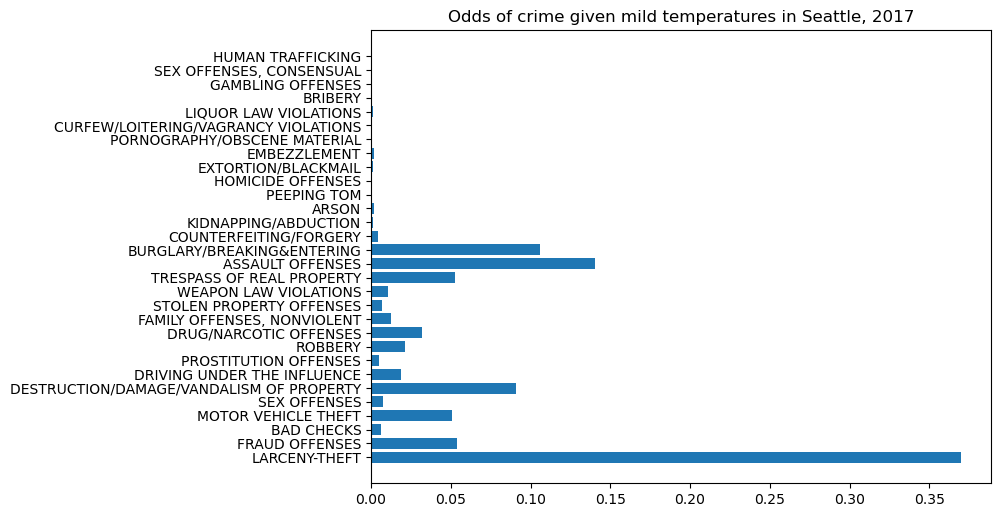

In [31]:
off = []
perc = []
for o,p in mild:
    off.append(o)
    perc.append(p)

figure(figsize=(8, 6), dpi=100)
plt.title("Odds of crime given mild temperatures in Seattle, 2017")
plt.barh(off,perc)

In [18]:
hot

[('LARCENY-THEFT', 0.36737),
 ('FRAUD OFFENSES', 0.03458),
 ('BAD CHECKS', 0.00324),
 ('MOTOR VEHICLE THEFT', 0.05024),
 ('SEX OFFENSES', 0.00486),
 ('DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 0.094),
 ('DRIVING UNDER THE INFLUENCE', 0.01999),
 ('PROSTITUTION OFFENSES', 0.01459),
 ('ROBBERY', 0.01999),
 ('DRUG/NARCOTIC OFFENSES', 0.03728),
 ('FAMILY OFFENSES, NONVIOLENT', 0.01837),
 ('STOLEN PROPERTY OFFENSES', 0.00378),
 ('WEAPON LAW VIOLATIONS', 0.00972),
 ('TRESPASS OF REAL PROPERTY', 0.0524),
 ('ASSAULT OFFENSES', 0.15667),
 ('BURGLARY/BREAKING&ENTERING', 0.10535),
 ('COUNTERFEITING/FORGERY', 0.00054),
 ('KIDNAPPING/ABDUCTION', 0.00054),
 ('ARSON', 0.00216),
 ('PEEPING TOM', 0.0),
 ('HOMICIDE OFFENSES', 0.00054),
 ('EXTORTION/BLACKMAIL', 0.00054),
 ('EMBEZZLEMENT', 0.00108),
 ('PORNOGRAPHY/OBSCENE MATERIAL', 0.0),
 ('CURFEW/LOITERING/VAGRANCY VIOLATIONS', 0.00054),
 ('LIQUOR LAW VIOLATIONS', 0.00162),
 ('BRIBERY', 0.0),
 ('GAMBLING OFFENSES', 0.0),
 ('SEX OFFENSES, CONSENSUAL', 0.

<BarContainer object of 30 artists>

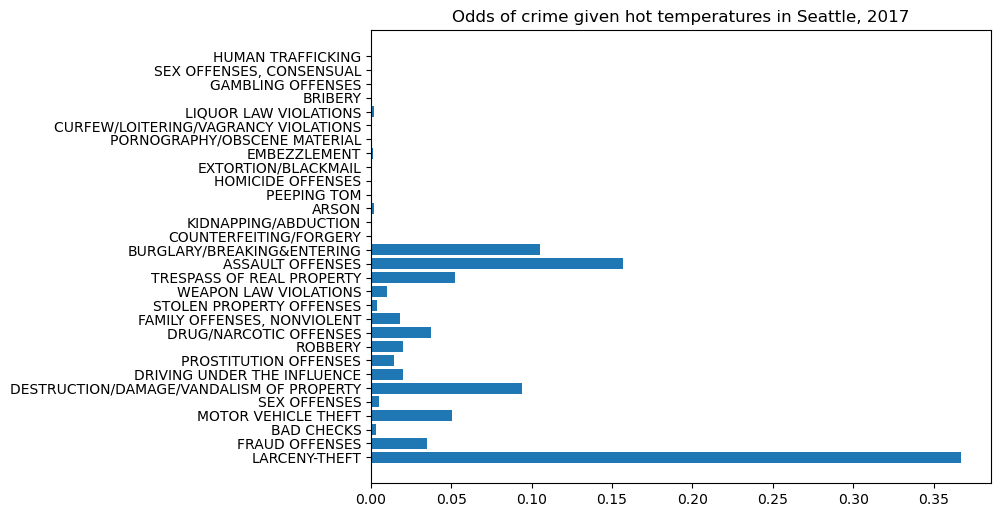

In [32]:
off = []
perc = []
for o,p in hot:
    off.append(o)
    perc.append(p)

figure(figsize=(8, 6), dpi=100)
plt.title("Odds of crime given hot temperatures in Seattle, 2017")
plt.barh(off,perc)